In [35]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from src.logger import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [86]:
path=r'D:\Ml-Projects\Customer-Churn\notebook\data\customer_churn_dataset-testing-master.csv'
df=pd.read_csv(path)

In [87]:
df1=df

In [88]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Checking Missing Values

In [89]:
# Data Quality Report
def generate_data_quality_report(df):
    report = {}

    # Missing Values Check
    missing_values = df.isnull().sum()
    report["Missing Values (%)"] = (missing_values / len(df)) * 100

    # Data Type Validation
    expected_types = {
    "CustomerID":  "int64",
    "Age":"int64",  
    "Gender": "object",
    "Tenure":"int64", 
    "Usage Frequency": "int64", 
    "Support Calls"  : "int64" ,
    "Payment Delay" : "int64" ,
    "Subscription Type"  : "object",
    "Contract Length" : "object",
    "Total Spend": "int64" ,
    "Last Interaction" : "int64" ,
    "Churn"  : "object" ,
    }
    
    actual_types = df.dtypes
    report["Incorrect Data Types"] = {col: str(actual_types[col]) for col in expected_types if str(actual_types[col]) != expected_types[col]}

    # Outlier Detection (Numeric Fields)
    numeric_cols = df.select_dtypes(include=['number']).columns
    outliers = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        if outlier_count > 0:
            outliers[col] = outlier_count
    report["Outliers Detected"] = outliers

    # Duplicate Records Check
    duplicate_count = df.duplicated().sum()
    report["Duplicate Records"] = duplicate_count

    # Logging Report
    logging.info("Data Quality Report Generated")
    logging.info(report)

    return report

# Run Validation
data_quality_report = generate_data_quality_report(df)
print(data_quality_report)


{'Missing Values (%)': CustomerID           0.0
Age                  0.0
Gender               0.0
Tenure               0.0
Usage Frequency      0.0
Support Calls        0.0
Payment Delay        0.0
Subscription Type    0.0
Contract Length      0.0
Total Spend          0.0
Last Interaction     0.0
Churn                0.0
dtype: float64, 'Incorrect Data Types': {'Churn': 'int64'}, 'Outliers Detected': {}, 'Duplicate Records': np.int64(0)}


In [90]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Data quality Report Generation

In [91]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [92]:
#check null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [73]:
#checking count of unique values in each column
df1.nunique()

CustomerID           64374
Age                     48
Gender                   2
Tenure                  60
Usage Frequency         30
Support Calls           11
Payment Delay           31
Subscription Type        3
Contract Length          3
Total Spend            901
Last Interaction        30
Churn                    2
dtype: int64

In [93]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [94]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [97]:
df1['Churn']=df1['Churn'].map({0: 'False', 1: 'True'})

In [101]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.drop("Churn", errors="ignore")

cat_cols = df.select_dtypes(include=['object']).columns


In [102]:
cat_cols

Index(['Gender', 'Subscription Type', 'Contract Length', 'Churn'], dtype='object')

In [100]:
df1.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,True
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,False
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,False
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,False
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,False


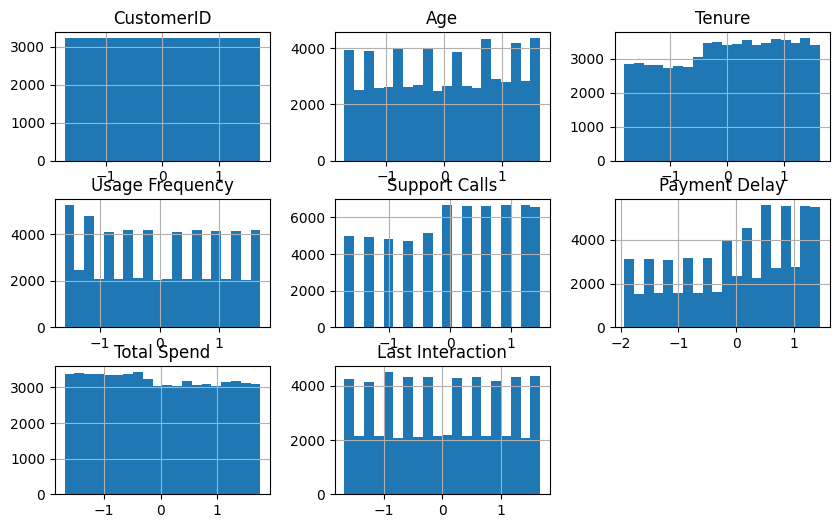

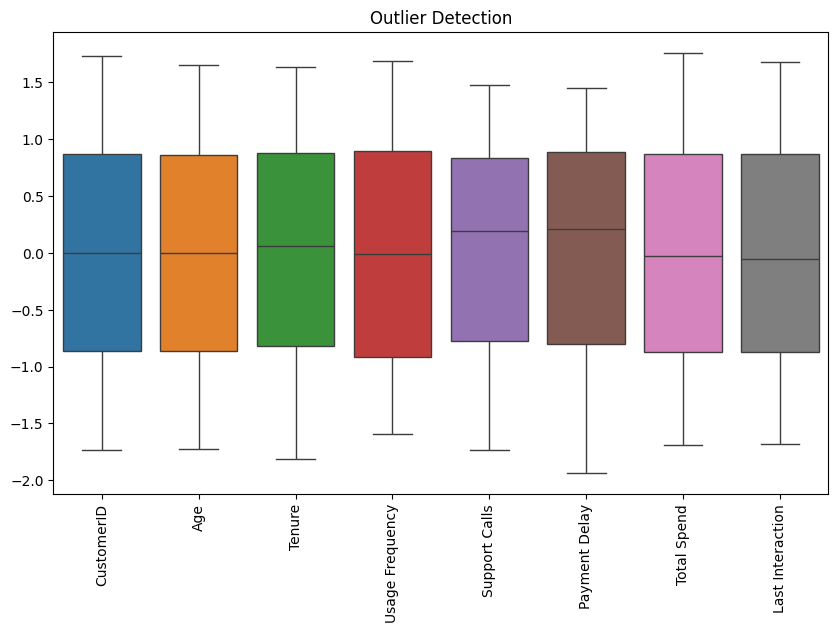

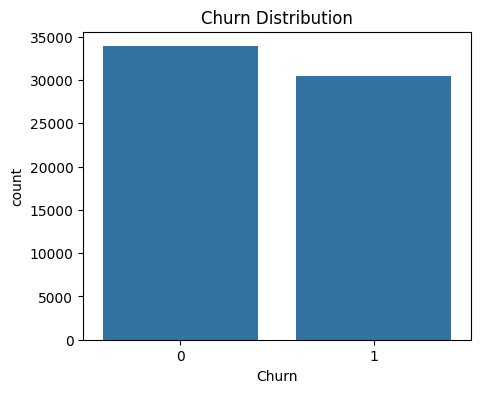

In [103]:

# Ensure categorical columns exist before imputation
if len(cat_cols) > 0:
    # Fill missing categorical values with the most frequent value
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = mode_imputer.fit_transform(df[cat_cols])

# --------------- Step 1: Handle Missing Values ---------------
# Fill missing numerical values with median
if len(num_cols) > 0:
    median_imputer = SimpleImputer(strategy="median")
    df[num_cols] = median_imputer.fit_transform(df[num_cols])

# --------------- Step 2: Normalize Numerical Features ---------------
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# --------------- Step 3: Encode Categorical Variables using LabelEncoder ---------------
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# --------------- Step 4: Perform Exploratory Data Analysis (EDA) ---------------
# Plot distributions of numerical features
df[num_cols].hist(figsize=(10, 6), bins=20)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Churn Rate Visualization
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()



In [104]:
df['Subscription Type'].value_counts()

Subscription Type
2    21502
0    21451
1    21421
Name: count, dtype: int64

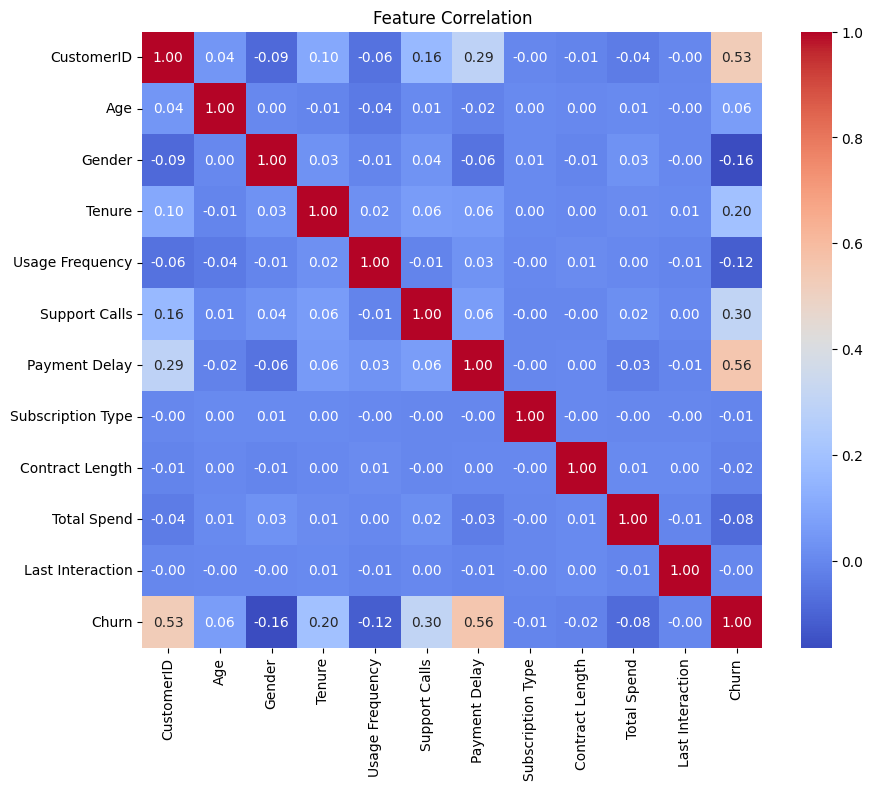

In [105]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()



In [108]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Avg Spend Per Tenure,Recency Score
0,-1.732024,-1.434202,0,-0.409100,-0.122526,-0.449807,1.114538,0,1,0.218408,-0.752324,1,-0.533874,2.431014
1,-1.731970,-0.069730,0,-0.233642,1.465424,0.513590,-0.467000,2,1,0.164742,0.521065,0,-0.705104,1.157626
2,-1.731916,0.361155,1,-0.292128,-0.576225,-1.092072,1.340472,1,0,0.827900,0.636827,0,-2.834036,1.041863
3,-1.731862,-0.500616,1,-1.344876,-0.349375,-0.128674,-0.015132,1,2,-1.184575,0.289540,0,0.880806,1.389151
4,-1.731809,0.792041,0,1.520939,1.011724,1.155855,-1.709637,2,0,-0.030756,0.289540,0,-0.020222,1.389151


In [107]:
# Feature Engineering
df["Avg Spend Per Tenure"] = df["Total Spend"] / df["Tenure"].replace(0, 1)  # Avoid division by zero

# Convert 'Last Interaction' to a relative recency score (higher means more recent)
df["Recency Score"] = df["Last Interaction"].max() - df["Last Interaction"]

In [110]:
df["Recency Score"].max()

np.float64(3.357115148469959)